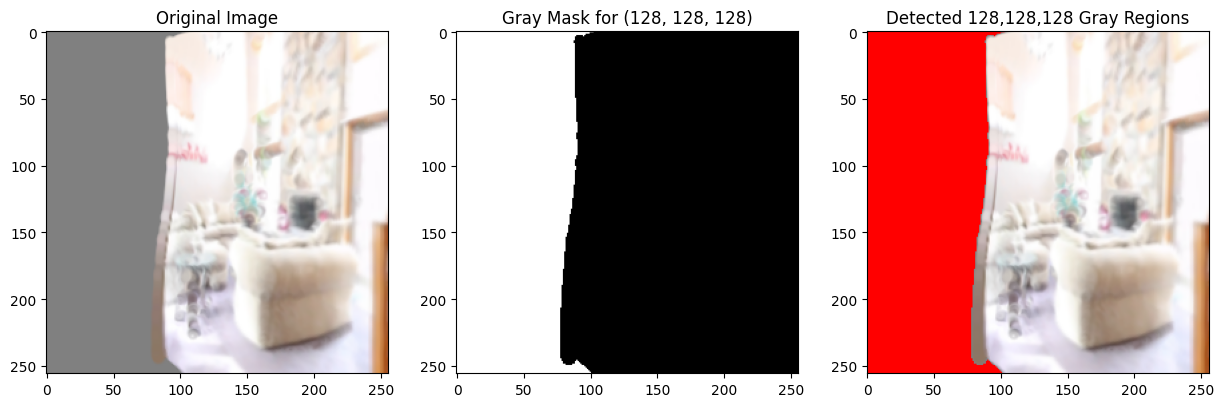

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = './data/realestate/input_fs/16.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 定义精确的灰色 (128, 128, 128) 的颜色阈值范围
lower_gray = np.array([128, 128, 128])
upper_gray = np.array([128, 128, 128])

# 创建mask，检测与(128, 128, 128)颜色匹配的区域
mask = cv2.inRange(image, lower_gray, upper_gray)

# 查找连续的灰色区域轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 在原图上绘制轮廓或填充灰色区域
image_with_contours = image_rgb.copy()
for contour in contours:
    # 根据面积过滤出较大的连续区域（可调整阈值）
    area = cv2.contourArea(contour)
    if area > 50:  # 根据需要调整面积阈值
        # 填充连续的灰色区域
        cv2.drawContours(image_with_contours, [contour], -1, (255, 0, 0), thickness=cv2.FILLED)  # 用蓝色填充

# 显示结果
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title('Gray Mask for (128, 128, 128)')
plt.imshow(mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Detected 128,128,128 Gray Regions')
plt.imshow(image_with_contours)
plt.show()


In [9]:
import os
import shutil

# 设置源目录路径
source_dir = './data/exp_set'
# 设置目标目录路径
input_dir = './data/input'
gt_dir = './data/gt'

# 创建目标目录
os.makedirs(input_dir, exist_ok=True)
os.makedirs(gt_dir, exist_ok=True)

# 遍历每个编号文件夹
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)
    if os.path.isdir(folder_path):
        # 获取文件夹内的图片文件并排序
        images = sorted([img for img in os.listdir(folder_path) if img.endswith('.jpg')])

        # 确保文件夹中至少有一张中间编号的图片
        if len(images) % 2 == 1:
            # 计算中间图片的索引
            mid_index = len(images) // 2
            gt_image = images[mid_index]
            gt_image_path = os.path.join(folder_path, gt_image)

            # 将中间编号图片复制到 input 文件夹
            shutil.copy(gt_image_path, os.path.join(input_dir, gt_image))

            # 处理旋转角度图片
            for i, image in enumerate(images):
                if i != mid_index:  # 排除中间的 GT 图片
                    angle = (i - mid_index) * 10  # 根据索引计算旋转角度
                    angle_dir = os.path.join(gt_dir, f'{angle}')
                    os.makedirs(angle_dir, exist_ok=True)

                    # 复制旋转图片到对应角度的子文件夹
                    shutil.copy(os.path.join(folder_path, image), os.path.join(angle_dir, image))

print("文件分类完成！")


文件分类完成！


In [1]:
import os
import shutil

def extract_and_organize_output_files(base_folder, target_base_folder):
    # Mapping of subfolder name to angle designation
    angle_mapping = {
        'L': [-10, -20, -30],  # L side angles
        'R': [10, 20, 30]      # R side angles
    }

    # Iterate over 'L' and 'R' main folders
    for side in ['L', 'R']:
        side_folder = os.path.join(base_folder, side)
        if not os.path.isdir(side_folder):
            continue  # Skip if side folder doesn't exist

        # Iterate over the subfolders 0, 1, 2 within each side
        for index, angle in enumerate(angle_mapping[side]):
            angle_folder_name = str(angle)  # Target folder name based on angle
            target_folder = os.path.join(target_base_folder, angle_folder_name)
            os.makedirs(target_folder, exist_ok=True)  # Create target folder if it doesn't exist

            # Current subfolder path (0, 1, or 2 under L or R)
            subfolder = os.path.join(side_folder, str(index))
            if not os.path.isdir(subfolder):
                continue  # Skip if subfolder doesn't exist

            # Find all files starting with "output" and copy them
            for file_name in os.listdir(subfolder):
                if file_name.startswith("output"):
                    src_path = os.path.join(subfolder, file_name)
                    dst_path = os.path.join(target_folder, file_name)
                    shutil.copy(src_path, dst_path)
                    print(f"Copied '{file_name}' from '{subfolder}' to '{target_folder}'")

# Example usage
base_folder = './data/pixelSyn'  # Replace with your main folder path
target_base_folder = './data/pixelSyn_output'  # Replace with your desired output folder
extract_and_organize_output_files(base_folder, target_base_folder)


Copied 'output_image_L_0.png' from './data/pixelSyn\L\0' to './data/pixelSyn_output\-10'
Copied 'output_image_L_0.png' from './data/pixelSyn\L\1' to './data/pixelSyn_output\-20'
Copied 'output_image_L_0.png' from './data/pixelSyn\L\2' to './data/pixelSyn_output\-30'
Copied 'output_image_R_0.png' from './data/pixelSyn\R\0' to './data/pixelSyn_output\10'
Copied 'output_image_R_0.png' from './data/pixelSyn\R\1' to './data/pixelSyn_output\20'
Copied 'output_image_R_0.png' from './data/pixelSyn\R\2' to './data/pixelSyn_output\30'


In [4]:
import os
import shutil

# 定义输入和输出路径
input_path = './data/pixelSyn'
output_path = './data/pixelSyn_output'

# 定义角度映射
angle_map = {
    'L': { '0': '10', '1': '20', '2': '30' },
    'R': { '0': '-10', '1': '-20', '2': '-30' }
}

# 确保输出路径存在
os.makedirs(output_path, exist_ok=True)

# 遍历场景编号文件夹
for scene_id in range(20):
    scene_path = os.path.join(input_path, str(scene_id))

    # 检查 'L' 和 'R' 文件夹是否存在
    for direction in ['L', 'R']:
        direction_path = os.path.join(scene_path, direction)

        # 读取每个角度文件夹
        if os.path.exists(direction_path):
            for angle_key, angle_value in angle_map[direction].items():
                angle_folder_path = os.path.join(direction_path, angle_key)

                # 如果角度文件夹存在
                if os.path.exists(angle_folder_path):
                    # 遍历文件夹中的所有文件
                    for filename in os.listdir(angle_folder_path):
                        if 'output' not in filename: continue
                        src_file = os.path.join(angle_folder_path, filename)
                        dest_folder = os.path.join(output_path, angle_value)
                        os.makedirs(dest_folder, exist_ok=True)
                        dest_file = os.path.join(dest_folder, f'{scene_id}_{filename}')

                        # 移动文件到目标路径
                        shutil.copy2(src_file, dest_file)
                        print(f'Copied {src_file} to {dest_file}')


Copied ./data/pixelSyn\0\L\0\output_image_L_0.png to ./data/pixelSyn_output\10\0_output_image_L_0.png
Copied ./data/pixelSyn\0\L\1\output_image_L_0.png to ./data/pixelSyn_output\20\0_output_image_L_0.png
Copied ./data/pixelSyn\0\L\2\output_image_L_0.png to ./data/pixelSyn_output\30\0_output_image_L_0.png
Copied ./data/pixelSyn\0\R\0\output_image_R_0.png to ./data/pixelSyn_output\-10\0_output_image_R_0.png
Copied ./data/pixelSyn\0\R\1\output_image_R_0.png to ./data/pixelSyn_output\-20\0_output_image_R_0.png
Copied ./data/pixelSyn\0\R\2\output_image_R_0.png to ./data/pixelSyn_output\-30\0_output_image_R_0.png
Copied ./data/pixelSyn\1\L\0\output_image_L_0.png to ./data/pixelSyn_output\10\1_output_image_L_0.png
Copied ./data/pixelSyn\1\L\1\output_image_L_0.png to ./data/pixelSyn_output\20\1_output_image_L_0.png
Copied ./data/pixelSyn\1\L\2\output_image_L_0.png to ./data/pixelSyn_output\30\1_output_image_L_0.png
Copied ./data/pixelSyn\1\R\0\output_image_R_0.png to ./data/pixelSyn_output\-10